# #TESTING

In [1]:
cd ..

c:\git\hwars


In [2]:
#dataset for test
from datasets import load_dataset

dataset = load_dataset("binitt/hwars-buttons", split="train")
dataset = dataset.train_test_split(test_size=0.1)
# model_name = "data/model/buttons/"
model_name = "binitt/hwars-buttons-model"

0: Detected button with confidence 0.968 at location [1339.5, 1199.03, 1569.71, 1275.21]
1: Detected button with confidence 0.96 at location [1796.06, 318.7, 1871.79, 395.99]
2: Detected button with confidence 0.925 at location [2307.98, 200.63, 2377.53, 275.0]
3: Detected button with confidence 0.959 at location [1102.88, 1195.82, 1332.39, 1270.0]
4: Detected button with confidence 0.981 at location [1548.88, 1026.79, 1804.08, 1121.91]
5: Detected button with confidence 0.929 at location [1655.88, 14.65, 1792.13, 90.96]
6: Detected button with confidence 0.916 at location [2062.26, 201.57, 2125.25, 270.47]


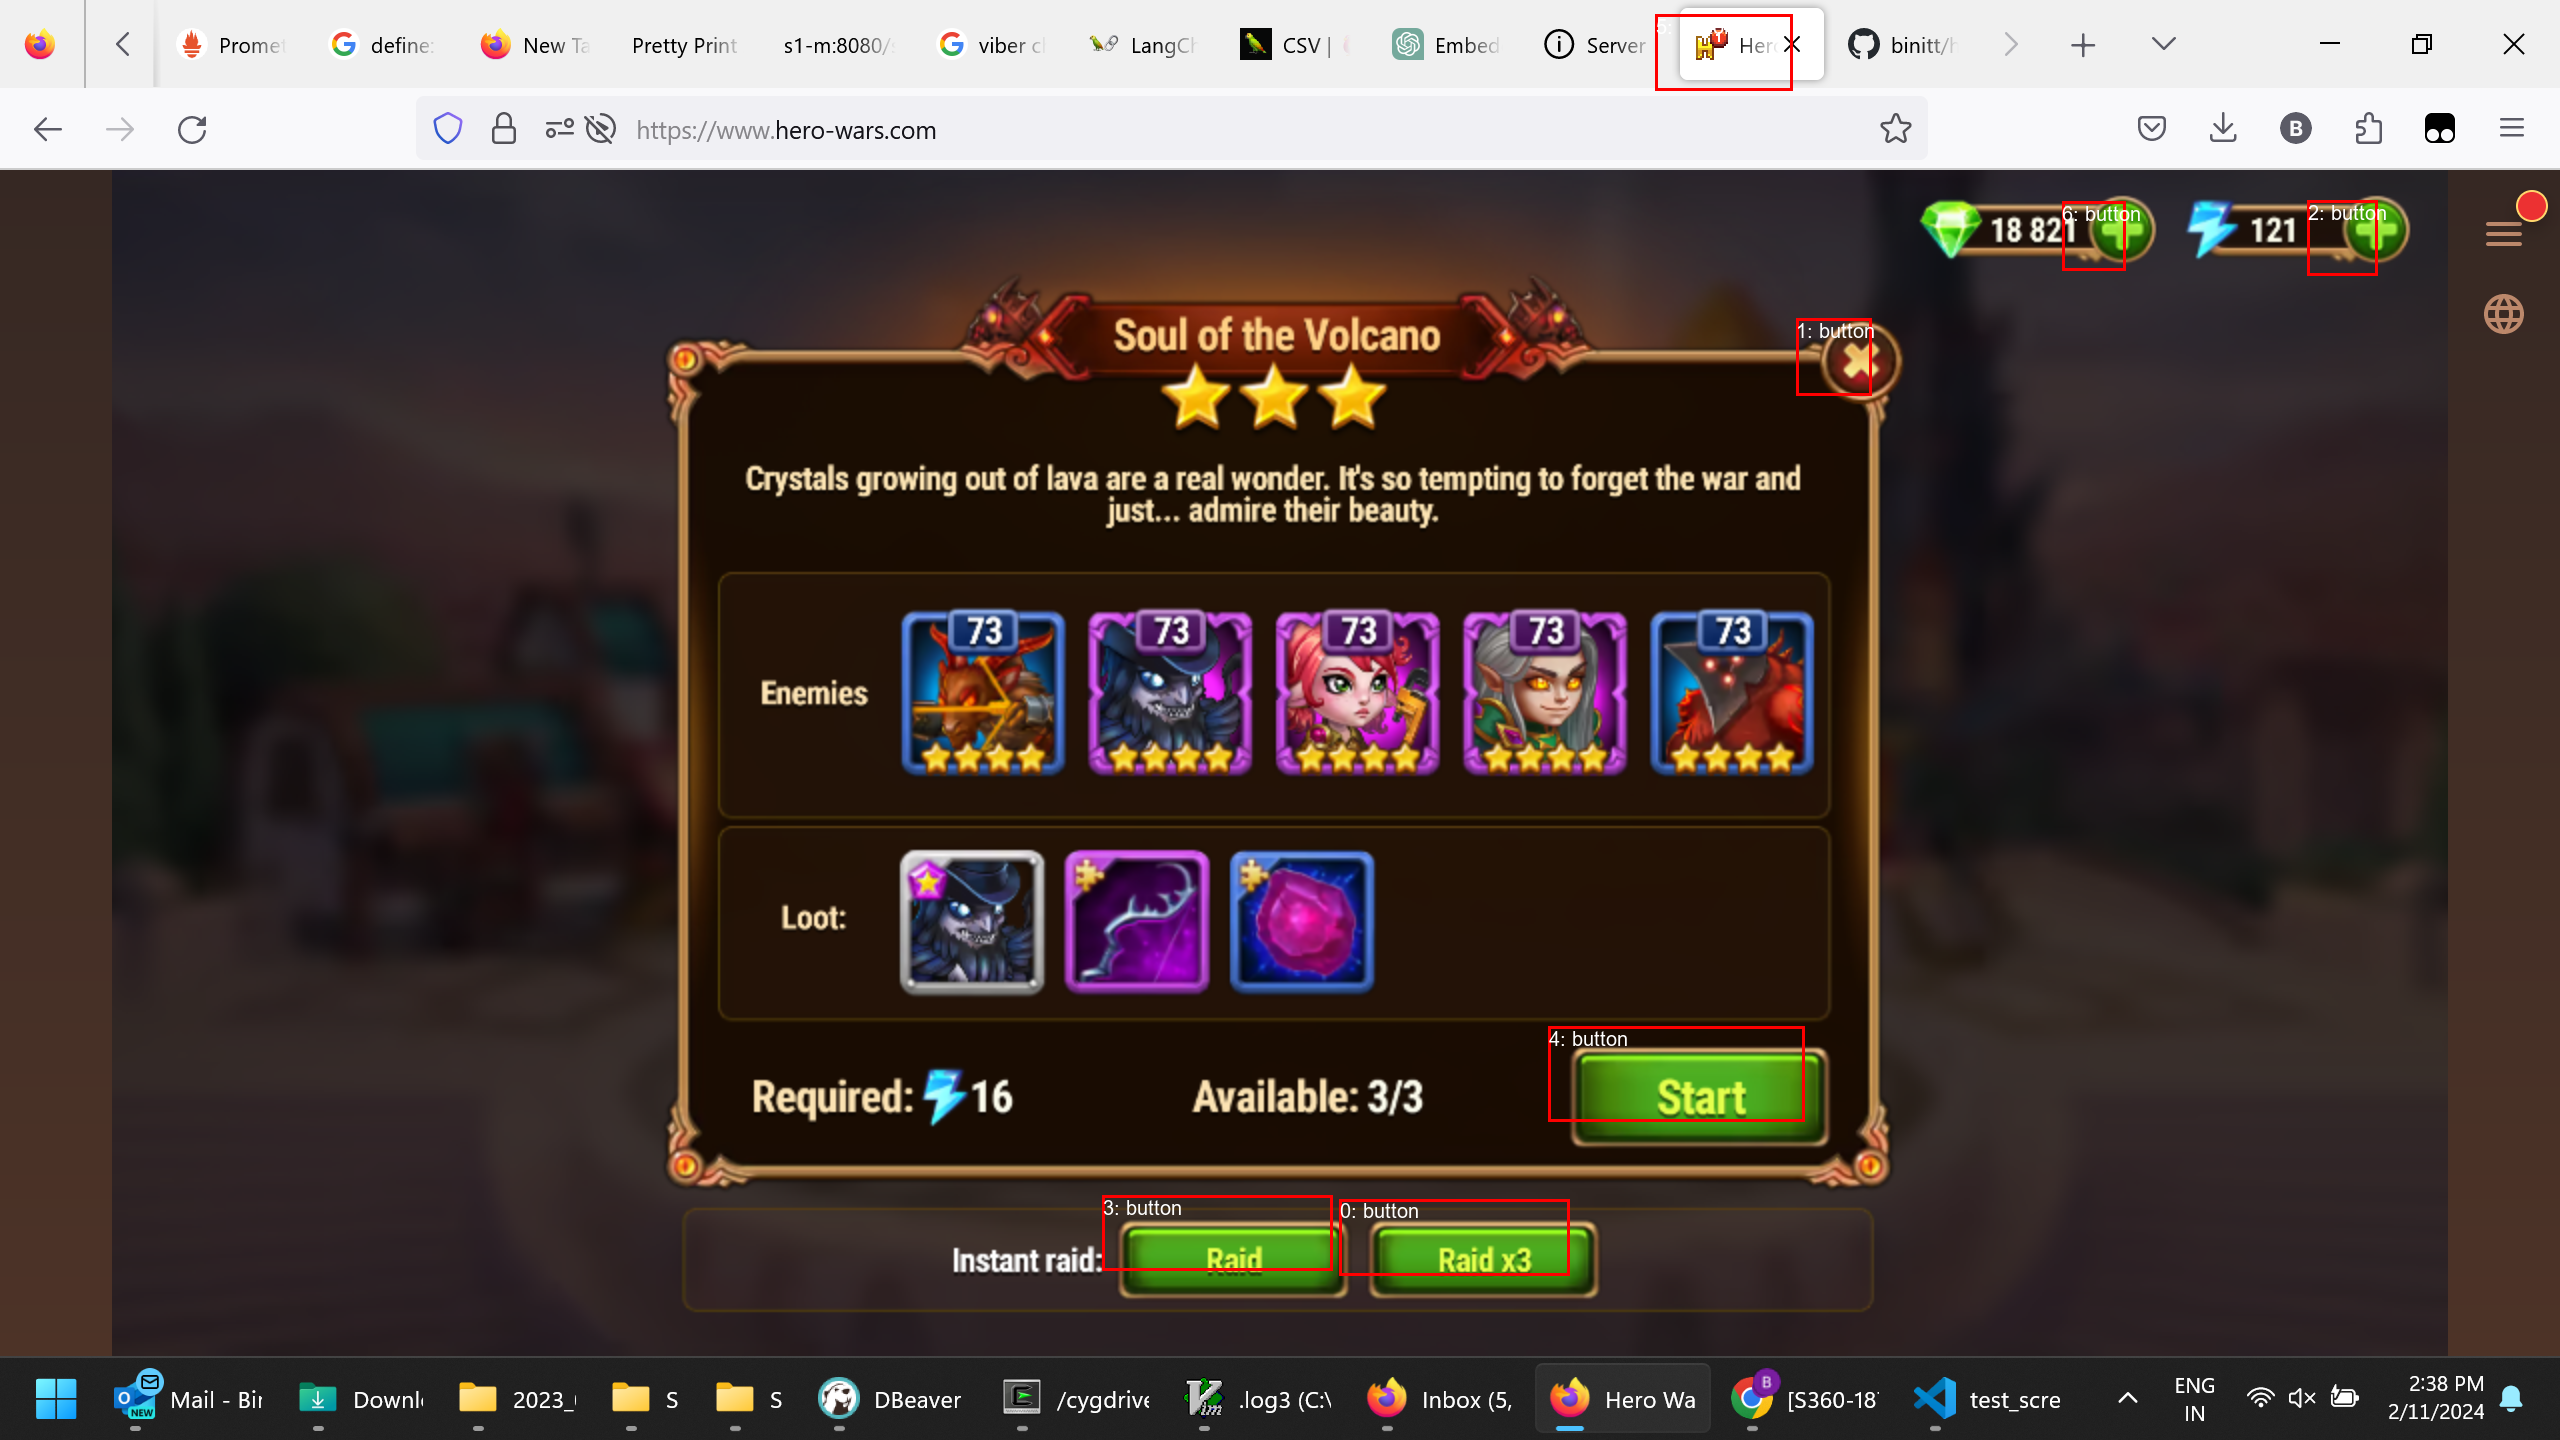

In [15]:
import torch
from transformers import AutoImageProcessor
from transformers import AutoModelForObjectDetection
from PIL import Image, ImageDraw, ImageFont

image_processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModelForObjectDetection.from_pretrained(model_name)

# f = open(r'data/buttons/ss-7-victory.png', "rb")
# image = Image.open(f)

image = dataset['train'][3]['image']
with torch.no_grad():
    inputs = image_processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    target_sizes = torch.tensor([image.size[::-1]])
    results = image_processor.post_process_object_detection(outputs, threshold=0.8, target_sizes=target_sizes)[0]

i = 0
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"{i}: Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )
    i += 1

draw = ImageDraw.Draw(image)
font = ImageFont.truetype("arial.ttf", 20)

i = 0
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    x, y, x2, y2 = tuple(box)
    draw.rectangle((x, y, x2, y2), outline="red", width=3)
    draw.text((x, y), f"{i}: {model.config.id2label[label.item()]}", fill="white", font=font)
    i += 1

image        